# <span style="color:black"> Numerical Simulation Laboratory (NSL) </span>

## Francesco Gnan - <span style="color:grey">  Numerical Exercises 10</span>
------------------------------------------------------------------------------------------------------------------------------

# <span style="color:red"> Introduction </span>

In this exercise we address some aspects of **Parallel Programming**. We will parallelize the code developed in *exercise 09*, to improve its performance.

Thanks to <font face = "Courier"> `ssh` </font> we will connect to the computers in the university's computer lab, because we want to solve the **TSP** by performing a *Genetic Search* with 10 parallel GA searches of the optimal path.

We can think of each node as a **Continent**, which perform an independent GA search. In fact, by having each node read a different row of the <font face = "Courier"> `primes` </font> file, each Continent will use a random number generator that generates stochastically independent sequences.

To increase the **diversification** of research, every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

------------------------------------------------------------------------------------------------------------------------------

To accomplish our purposes we will use the **Message Passing Interface (MPI)** libraries. Also, since our computer does not allow us to open graphical interfaces using <font face = "Courier"> `ssh` </font>, we will adopt the <font face = "Courier"> `vim` </font> text editor to interact with the code directly from the command line.

------------------------------------------------------------------------------------------------------------------------------
We will apply our code to the TSP problem for 50 american state-capitals longitude and latitude coordinates in the <font face = "Courier"> `American_capitals.dat` </font>file.
  - First, we will study the performance of each Continent (core) separately, with no communication between them
  - Second, we will have them communicate through the <font face = "Courier"> `MPI_Bcast()` </font> function.

Below there is a list of the packages that will be used during this notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# <span style="color:red"> Indipendent Continents </span>

We first analize the case with no communication between the 10 Continents. We set a population of 1000 elements and 100 generations.

core 0: best L2: 4851.11
core 1: best L2: 4987.8
core 2: best L2: 5129.66
core 3: best L2: 4889.27
core 4: best L2: 5059.09
core 5: best L2: 4864.01
core 6: best L2: 5254.56
core 7: best L2: 4930.57
core 8: best L2: 4852.14
core 9: best L2: 4822.57


<Figure size 1080x576 with 0 Axes>

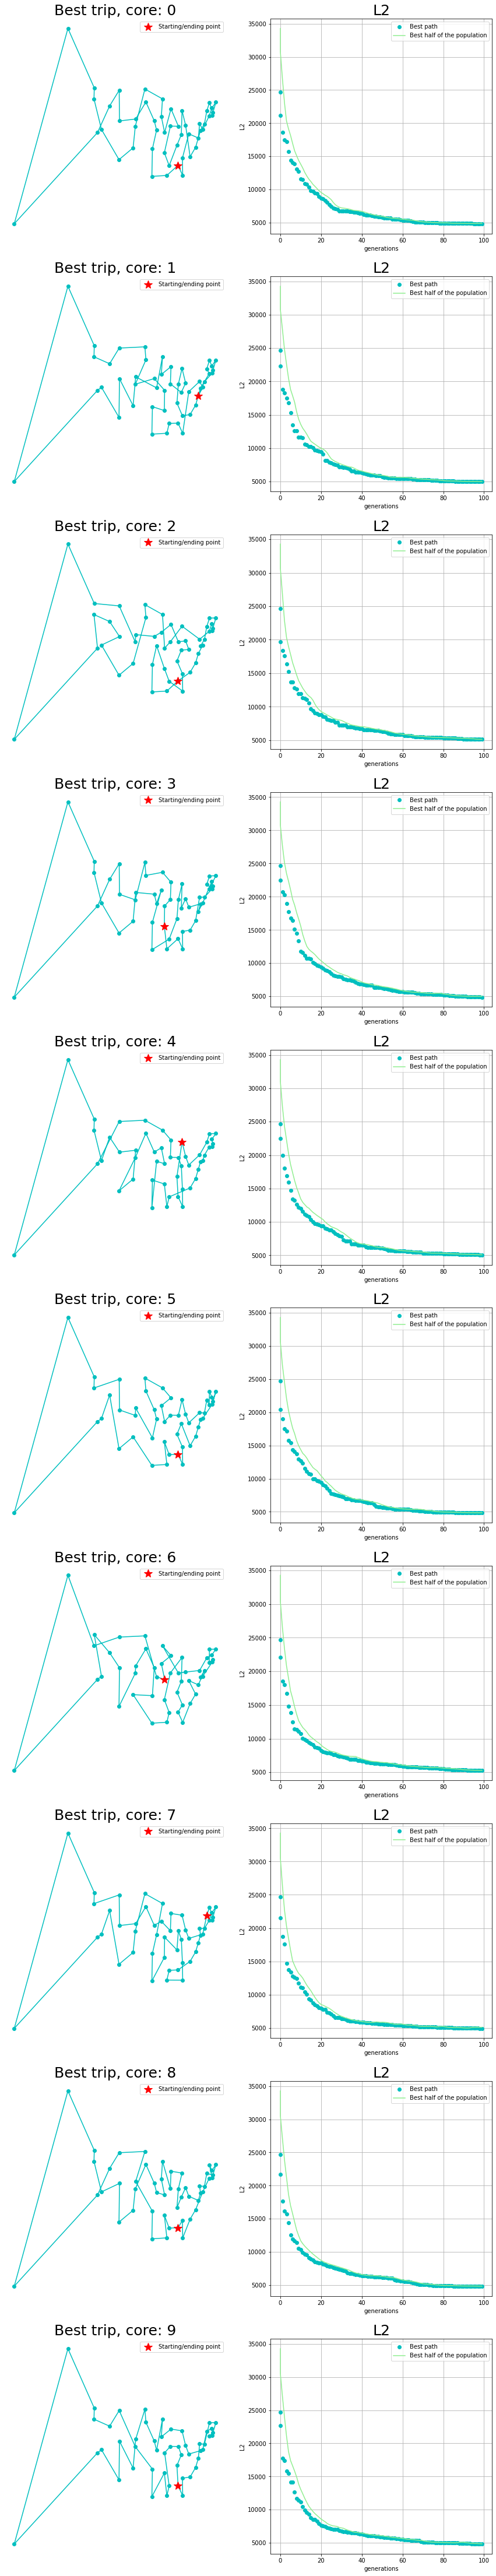

In [3]:
plt.figure(figsize=(15,8))
plt.suptitle('50 cities, 100 generation, 10 indipendent continents',fontsize=30)
fig, axs = plt.subplots(10,2, figsize = (15,80) )

for i in range(10):
    x, y = np.loadtxt("./Risultati/USA/USA_rk"+str(i)+".dat", usecols=(1,2), unpack='true')
    gen, L2 = np.loadtxt("./Risultati/USA/L2_rk"+str(i)+".dat", usecols=(0,1), unpack='true')
    genH, HL2 = np.loadtxt("./Risultati/USA/BestH_rk"+str(i)+".dat", usecols=(0,1), unpack='true')
    

    axs[i,0].plot(x,y,'-', marker="o", color = "c")
    axs[i,0].plot(x[0],y[0], "*", color = "red",markersize=15, label='Starting/ending point')
    axs[i,0].set_title('Best trip, core: ' + str(i),fontsize=25)
    axs[i,0].legend()
    axs[i,0].axis("off")
 
    axs[i,1].set_title('L2',fontsize=25)
    axs[i,1].plot(gen,L2, "o",color='c', label='Best path')
    axs[i,1].plot(genH,HL2,color='lightgreen', label='Best half of the population')
    axs[i,1].set_xlabel("generations")
    axs[i,1].set_ylabel("L2")
    axs[i,1].grid(True)
    axs[i,1].legend()
    print( "core "+str(i)+": best L2: "+str(L2[-1]) )
    
plt.show()

We can observe little differences in the best paths. Every core finds a local minimum. In order to get the best local minimum, hopefully the absolute one, we repeat the simulation setting <font face = "Courier"> `exchange = 1` </font> in <font face = "Courier"> `input.dat` </font> file.

# <span style="color:red"> Communicating Continents </span>

Every $20$ generations, thanks to the <font face = "Courier"> `MPI_Bcast` </font> function and the <font face = "Courier"> `Welcome(std::vector<Posizione>, int)` </font> method of the <font face = "Courier"> `GA` </font> class, Continents share their best paths.

core 0: best L2: 4648.86
core 1: best L2: 4646.99
core 2: best L2: 4643.81
core 3: best L2: 4644.57
core 4: best L2: 4645.74
core 5: best L2: 4644.95
core 6: best L2: 4643.81
core 7: best L2: 4643.81
core 8: best L2: 4643.81
core 9: best L2: 4648.86


<Figure size 1080x576 with 0 Axes>

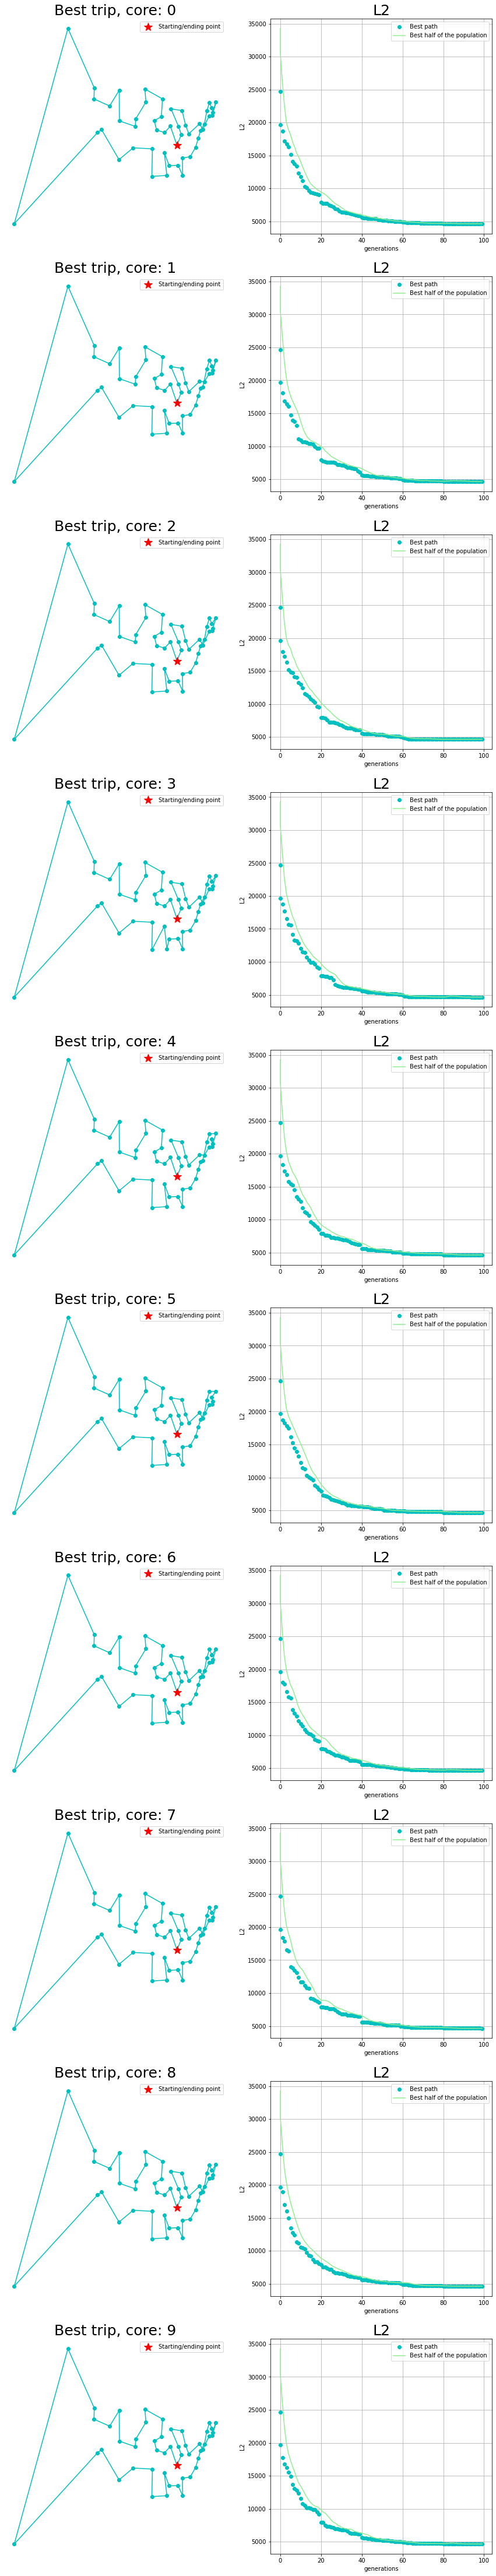

In [4]:
plt.figure(figsize=(15,8))
plt.suptitle('50 cities, 100 generation, 10 communicating continents',fontsize=30)
fig, axs = plt.subplots(10,2, figsize = (15,80) )

for i in range(10):
    x, y = np.loadtxt("./Risultati/USA/Migration_USA_rk"+str(i)+".dat", usecols=(1,2), unpack='true')
    gen, L2 = np.loadtxt("./Risultati/USA/Migration_L2_rk"+str(i)+".dat", usecols=(0,1), unpack='true')
    genH, HL2 = np.loadtxt("./Risultati/USA/Migration_BestH_rk"+str(i)+".dat", usecols=(0,1), unpack='true')
    

    axs[i,0].plot(x,y,'-', marker="o", color = "c")
    axs[i,0].plot(x[0],y[0], "*", color = "red",markersize=15, label='Starting/ending point')
    axs[i,0].set_title('Best trip, core: ' + str(i),fontsize=25)
    axs[i,0].legend()
    axs[i,0].axis("off")
 
    axs[i,1].set_title('L2',fontsize=25)
    axs[i,1].plot(gen,L2, "o",color='c', label='Best path')
    axs[i,1].plot(genH,HL2,color='lightgreen', label='Best half of the population')
    axs[i,1].set_xlabel("generations")
    axs[i,1].set_ylabel("L2")
    axs[i,1].grid(True)
    axs[i,1].legend()
    
    print( "core "+str(i)+": best L2: "+str(L2[-1]) )    
    
plt.show()

We observe that due to only 5 migrations, the search result improves significantly. Not all ten cores find the exact same path: this is due to the fact that we set only 100 generations.

# <span style="color:red"> Final result </span>

We use the previous input parameters, but with 1000 generations. All cores find the following identical optimal solution.

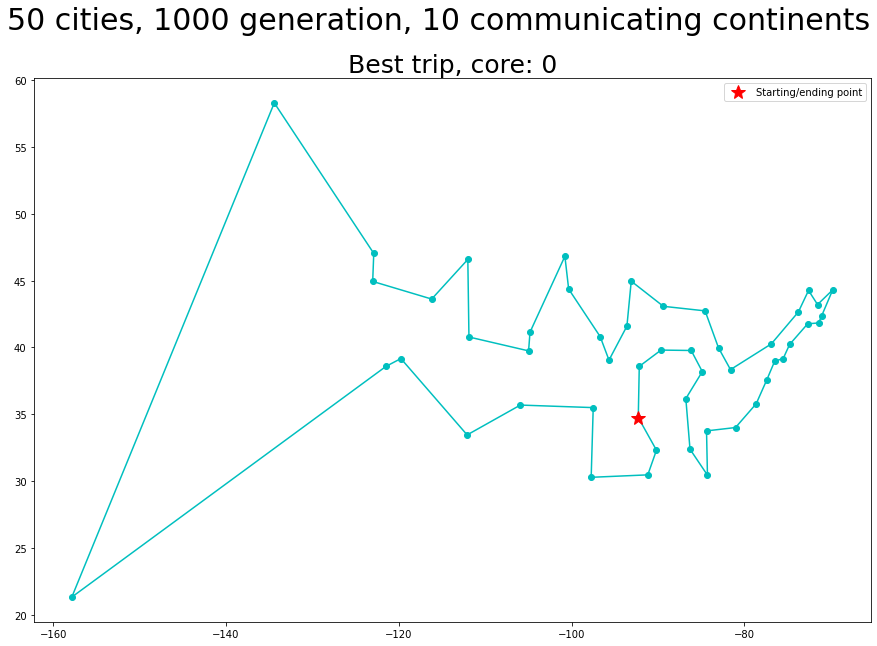

core 0, best L2: 4594.84


In [29]:
plt.figure(figsize=(15,10))
plt.suptitle('50 cities, 1000 generation, 10 communicating continents',fontsize=30)

x, y = np.loadtxt("./Risultati/BEST/BEST_USA_rk1.dat", usecols=(1,2), unpack='true')
gen, L2 = np.loadtxt("./Risultati/BEST/BEST_L2_rk0.dat", usecols=(0,1), unpack='true')

plt.plot(x,y,'-', marker="o", color = "c")
plt.plot(x[0],y[0], "*", color = "red",markersize=15, label='Starting/ending point')
plt.title('Best trip, core: 0',fontsize=25)
plt.legend()
plt.show()

print( "core 0, best L2: "+str(L2[-1]) )